
# Exoplanet Classification Project 

1. [Introduction](#introduction)
2. [Dataset](#dataset)
3. [Data Exploration](#data-exploration)
    3.1 Initial Columns Cleaning
4. [Data Preprocessing](#data-preprocessing)
5. [Model Building](#model-building)
6. [Model Evaluation](#model-evaluation)
7. [Conclusion](#conclusion)
8. [References](#references)

## 1. Introduction
In this project, we will explore the classification of exoplanets using various machine learning techniques. Exoplanets are planets that orbit stars outside our solar system. The goal of this project is to build a model that can accurately classify weather a Kepler object is an exoplanet based on their recorded features.

#### Imports

In [1]:
import pandas as pd
import os
import xml.etree.ElementTree as ET, urllib.request, gzip, io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #missing values plot


from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek

------------------------------------------------------------------------------------------------------

<a id='dataset'></a>

## 2. Dataset
We will be using the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html), specifically the [Kepler Objects of Interest (KOIs)](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative) dataset for this project. This dataset contains information about confirmed exoplanets as well as false positives. It includes features such as orbital period, transit depth, planet radius, and more. The target variable is the exoplanet classification, which can be either "Confirmed", "Candidate" or "False Positive". The dataset is updated regularlly.

A snapshot of the table should be saved near the code, here we will load the csv into a dataframe.

#https://drive.google.com/file/d/1WfxroJ_5XD5NE14ZAM4GvsUWoLgI0k1v/view?usp=share_link

In [2]:
nasa_df = pd.read_csv('NASA_cumulative_2023.03.12_03.51.03.csv', skiprows=144)
nasa_df.set_index('rowid', inplace=True)

In [3]:
print("There are " + str(nasa_df.shape[0]) + " rows in the NASA data")
print("There are " + str(nasa_df.shape[1]) + " columns in the NASA data")

There are 9564 rows in the NASA data
There are 140 columns in the NASA data


As we can see in the raw data there are 9,564 rows and 140 columns.

We'll print a few rows, and information about the columns in order to see which are numeric or categorical.

In [4]:
# Print the shape of the dataset
print(nasa_df.shape)

#print first 5 rows of the dataset
nasa_df.head()

(9564, 140)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [5]:
# Analysing type of data
nasa_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9564 entries, 1 to 9564
Data columns (total 140 columns):
 #    Column              Dtype  
---   ------              -----  
 0    kepid               int64  
 1    kepoi_name          object 
 2    kepler_name         object 
 3    koi_disposition     object 
 4    koi_vet_stat        object 
 5    koi_vet_date        object 
 6    koi_pdisposition    object 
 7    koi_score           float64
 8    koi_fpflag_nt       int64  
 9    koi_fpflag_ss       int64  
 10   koi_fpflag_co       int64  
 11   koi_fpflag_ec       int64  
 12   koi_disp_prov       object 
 13   koi_comment         object 
 14   koi_period          float64
 15   koi_period_err1     float64
 16   koi_period_err2     float64
 17   koi_time0bk         float64
 18   koi_time0bk_err1    float64
 19   koi_time0bk_err2    float64
 20   koi_time0           float64
 21   koi_time0_err1      float64
 22   koi_time0_err2      float64
 23   koi_eccen           float64
 24   ko

------------------------------------------------------------------------------------------------------

# 3. Data Exploration 

3.1. Feature Importance 

3.2. 

3.3. Visualize the distribution of the target variable.

3.4. Explore the relationship between the features and the target variable.

------------------------------------------------------------------------------------------------------

<a id='data-exploration'></a>

# 4. Data Preprocessing
Before we start building our classification model, let's first explore the dataset. We will perform the following steps:

4.1. [Initial Feature Cleaning](#column-cleaning)

    - Rename columns.
    - Create target column.
    - Remove irrelevant columns.
    - Remove error columns.
    - Encode categorical features.

4.2. [Handling Missing Values](#missing-values)

    - Drop columns that have more than 50% missing values.
    - Drop rows that have more than 50% missing values.
    - Impute missing values.

4.3. [PCA Outlier Detection](#outliers)  

4.4. [Data Normalization](#normalization)

4.5. [Check for Correlated Features](#corr)

4.6. [Class Balancing](#balance)

4.7. [Feature Selection after SMOTE](#feature-selection)


<a id='column-cleaning'></a>
## 4.1. Initial Column Cleaning

### 4.1.1. Rename Columns
The column names in the loaded csv is an abbreviation of the full name, here we will load these names and rename the columns with the full feature name.

In [6]:
names = pd.read_csv('NASA_cumulative_2023.03.12_03.51.03.csv',skiprows=3, nrows=140, names=['full'])

names[['A', 'B']] = names['full'].str.split(':', 1, expand=True)
names[['AA', 'AAA']] = names['A'].str.split('COLUMN', 1, expand=True)

names.drop(columns=['full', 'A', 'AA'], inplace=True)
names.rename(columns={'B':'fullname',
                      'AAA':'currentname'}, inplace=True)
names = names.replace(' ', '', regex=True)

names.head()

,fullname,currentname
0,KepID,kepid
1,KOIName,kepoi_name
2,KeplerName,kepler_name
3,ExoplanetArchiveDisposition,koi_disposition
4,VettingStatus,koi_vet_stat


In [7]:
renaming = {}
for i, r in names.iterrows():
    renaming[r.currentname] = r.fullname

#rename columns with their full name
nasa_df = nasa_df.rename(columns=renaming)
nasa_df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,VettingStatus,DateofLastParameterUpdate,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,StellarEclipseFalsePositiveFlag,...,PRF&Delta;&delta;<sub>SQ</sub>(OOT)[arcsec],PRF&Delta;&delta;<sub>SQ</sub>(OOT)Unc.[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(OOT)[]arcsec,PRF&Delta;&theta;<sub>SQ</sub>(OOT)Unc.[arcsec],PRF&Delta;&alpha;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&alpha;<sub>SQ</sub>(KIC)Unc.[arcsec],PRF&Delta;&delta;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&delta;<sub>SQ</sub>(KIC)Unc.[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(KIC)Unc.[arcsec]
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


### 4.1.2. Create Target Column

We have two columns describing the disposition of a KOI:
* **Disposition Using Kepler Data**
  * This column describes whether a KOI [Kepler Object of Interest] is considered a candidate for an exoplanet, or a false positive, or a confirmed exoplanet.
*   **Exoplanet Archive Disposition** 
  * This column is similar to above, but it also incorporates newer peer-reviewed/published information from the Exoplanet Archive.

Since the second column includes a more fine grained disposition we will use it as our target.
We will create our target called '*ExoplanetConfirmed*' in the following manner:
- 0 if disposition is false positive or candidate.*italicized text*
- 1 if disposition is confirmed. 

In [8]:
nasa_df['ExoplanetArchiveDisposition'].value_counts()

FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: ExoplanetArchiveDisposition, dtype: int64

In [9]:
nasa_df['ExoplanetConfirmed'] = nasa_df['ExoplanetArchiveDisposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0)

nasa_df.head(2)

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,VettingStatus,DateofLastParameterUpdate,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,StellarEclipseFalsePositiveFlag,...,PRF&Delta;&delta;<sub>SQ</sub>(OOT)Unc.[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(OOT)[]arcsec,PRF&Delta;&theta;<sub>SQ</sub>(OOT)Unc.[arcsec],PRF&Delta;&alpha;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&alpha;<sub>SQ</sub>(KIC)Unc.[arcsec],PRF&Delta;&delta;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&delta;<sub>SQ</sub>(KIC)Unc.[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(KIC)Unc.[arcsec],ExoplanetConfirmed
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,...,0.16,0.20,0.17,0.08,0.13,0.31,0.17,0.32,0.16,1
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,...,0.48,0.39,0.36,0.49,0.34,0.12,0.73,0.50,0.45,1


In [10]:
nasa_df[nasa_df['DispositionUsingKeplerData'] == 'FALSE POSITIVE']

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,VettingStatus,DateofLastParameterUpdate,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,StellarEclipseFalsePositiveFlag,...,PRF&Delta;&delta;<sub>SQ</sub>(OOT)Unc.[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(OOT)[]arcsec,PRF&Delta;&theta;<sub>SQ</sub>(OOT)Unc.[arcsec],PRF&Delta;&alpha;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&alpha;<sub>SQ</sub>(KIC)Unc.[arcsec],PRF&Delta;&delta;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&delta;<sub>SQ</sub>(KIC)Unc.[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(KIC)Unc.[arcsec],ExoplanetConfirmed
rowid,,,,,,,,,,,,,,,,,,,,,
4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076,0
9,6721123,K00114.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.072,8.930,0.074,-4.537,0.071,7.713,0.074,8.948,0.077,0
15,10419211,K00742.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.067,0.013,0.067,0.147,0.067,0.037,0.070,0.151,0.067,0
16,10464078,K00743.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.068,0.009,0.068,-0.147,0.068,-0.038,0.069,0.152,0.068,0
17,10480982,K00744.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.067,0.006,0.067,-0.018,0.068,-0.203,0.067,0.203,0.067,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9558,10205598,K08198.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.008,1,0,...,0.160,2.550,0.140,2.370,0.140,-0.910,0.160,2.540,0.140,0
9559,10031643,K07984.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,0,...,1.000,1.750,0.820,1.350,0.600,-1.300,1.000,1.840,0.810,0
9560,10090151,K07985.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,1,...,0.068,2.763,0.074,2.344,0.072,-1.756,0.068,2.929,0.072,0


### 4.1.3. Remove Irrelevant Columns

After the creation of the target class we can remove the other information we have about the kepler disposition, which includes the following columns:


*   **KepID** : id number of the kepler.
*   **KOIName** : the KOI name.
*   **KeplerName** : kepler name.
*   **ExoplanetArchiveDisposition** : the disposition described above.
*   **VettingStatus** : "ACTIVE" or "DONE". Active provides the latest information for follow-up observations, and the transition to "DONE" status occurs when all dispositions are finalized and model parameters are updated appropriately.
*   **DateofLastParameterUpdate** : date of when the keplet info was last updated.
*   **DispositionUsingKeplerData** : the disposition described above.
*   **DispositionScore** : A value between 0 and 1 that indicates the confidence in the KOI disposition.
*   **Comment** : A description of the reason why an object's disposition has been given as false positive.
*   **NotTransit-LikeFalsePositiveFlag** : A KOI whose light curve is not consistent with that of a transiting planet.
*   **DispositionProvenance** : Disposition Provenance

It is important to remove these column because they have high correlation with our labels, which would introduce bias to our models.



In [11]:
todrop = ['KepID', 'KOIName', 'KeplerName', 'ExoplanetArchiveDisposition', 'VettingStatus', 
        'DateofLastParameterUpdate', 'DispositionUsingKeplerData', 'DispositionScore',
        'Comment', 'NotTransit-LikeFalsePositiveFlag', 
        'DispositionProvenance']

nasa_df.drop(columns=todrop, inplace=True)

nasa_df.head(3)

,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days],OrbitalPeriodUpperUnc.[days],OrbitalPeriodLowerUnc.[days],TransitEpoch[BKJD],TransitEpochUpperUnc.[BKJD],TransitEpochLowerUnc.[BKJD],TransitEpoch[BJD],...,PRF&Delta;&delta;<sub>SQ</sub>(OOT)Unc.[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(OOT)[]arcsec,PRF&Delta;&theta;<sub>SQ</sub>(OOT)Unc.[arcsec],PRF&Delta;&alpha;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&alpha;<sub>SQ</sub>(KIC)Unc.[arcsec],PRF&Delta;&delta;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&delta;<sub>SQ</sub>(KIC)Unc.[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(KIC)[arcsec],PRF&Delta;&theta;<sub>SQ</sub>(KIC)Unc.[arcsec],ExoplanetConfirmed
rowid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,9.488036,0.000028,-0.000028,170.538750,0.002160,-0.002160,2455003.539,...,0.16,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160,1
2,0,0,0,54.418383,0.000248,-0.000248,162.513840,0.003520,-0.003520,2454995.514,...,0.48,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450,1
3,0,0,0,19.899140,0.000015,-0.000015,175.850252,0.000581,-0.000581,2455008.850,...,0.07,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074,0


In [12]:
print("After removing unimportant columns we have:\n")
print("There are " + str(nasa_df.shape[0]) + " rows in the NASA data")
print("There are " + str(nasa_df.shape[1]) + " columns in the NASA data")

After removing unimportant columns we have:

There are 9564 rows in the NASA data
There are 130 columns in the NASA data


### 4.1.4. Remove Error Columns

Some columns are the errors margins of the calculations in other columns. We will remove these error columns

In [13]:
err_colummns = []

# go over cols and get every col with 'Unc.' in it
for c in nasa_df.columns:
    if 'Unc.' in c:
        err_colummns.append(c)


# finalize changes, but hold on to the data with error in case we need it later
data = nasa_df.drop(err_colummns, axis = 1)

print(f"\nDataset had {nasa_df.shape[1]} columns.\nIt now has {data.shape[1]} columns.")


Dataset had 130 columns.
It now has 72 columns.


### 4.1.5. Encoding Categorical Data



 Drop all columns that either contain 1 category, or contain too many categories.

In [14]:
# These columns either contain only zeros, NaNs, or are irrelevant to our target
useless_cols = ['LimbDarkeningModel', 'TransitModel', 'LinktoDVReport', 'LinktoDVSummary', 'Quarters', 'Eccentricity', 'LimbDarkeningCoeff.4', 'LimbDarkeningCoeff.3']

In [15]:
data.drop(useless_cols, axis=1, inplace=True)

In [16]:
# Create a temporary df that will contain all categorical data
# We will encode all these columns and merge them back to our main df
df_categorical = data.select_dtypes(object)

<h4><b> One-hot encode all categories. </b></h4>

In [17]:
#categorical data
categorical_cols = ['PlanetaryFitType', 'ParametersProvenance', 'TCEDelivery', 'StellarParameterProvenance'] 

#import pandas as pd
df_categorical = pd.get_dummies(df_categorical, columns = categorical_cols)
                                
df_categorical # We will merge this with the working DF and delete the categorical columns.

,PlanetaryFitType_LS,PlanetaryFitType_LS+MCMC,PlanetaryFitType_MCMC,PlanetaryFitType_none,ParametersProvenance_q1_q16_koi,ParametersProvenance_q1_q17_dr24_koi,ParametersProvenance_q1_q17_dr25_koi,TCEDelivery_q1_q16_tce,TCEDelivery_q1_q17_dr24_tce,TCEDelivery_q1_q17_dr25_tce,StellarParameterProvenance_Solar,StellarParameterProvenance_q1_q17_dr25_stellar,StellarParameterProvenance_stellar_q1_q16,StellarParameterProvenance_stellar_q1_q17
rowid,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
2,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,0,1,0,0,0,0,1,0,0,1,0,1,0,0
4,0,1,0,0,0,0,1,0,0,1,0,1,0,0
5,0,1,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,0,1,0,0,0,0,1,0,0,1,0,1,0,0
9561,0,1,0,0,0,0,1,0,0,1,0,1,0,0
9562,0,1,0,0,0,0,1,0,0,1,0,1,0,0


Drop all categorical data and concat the encoded ones

In [18]:
data.drop(categorical_cols, axis=1, inplace=True)
data = pd.concat([data, df_categorical], axis=1)

<a id='missing-values'></a>
## 4.2. Check & Handle Missing Values

First of all, we check how much missing values there are in the dataset.

<AxesSubplot:>

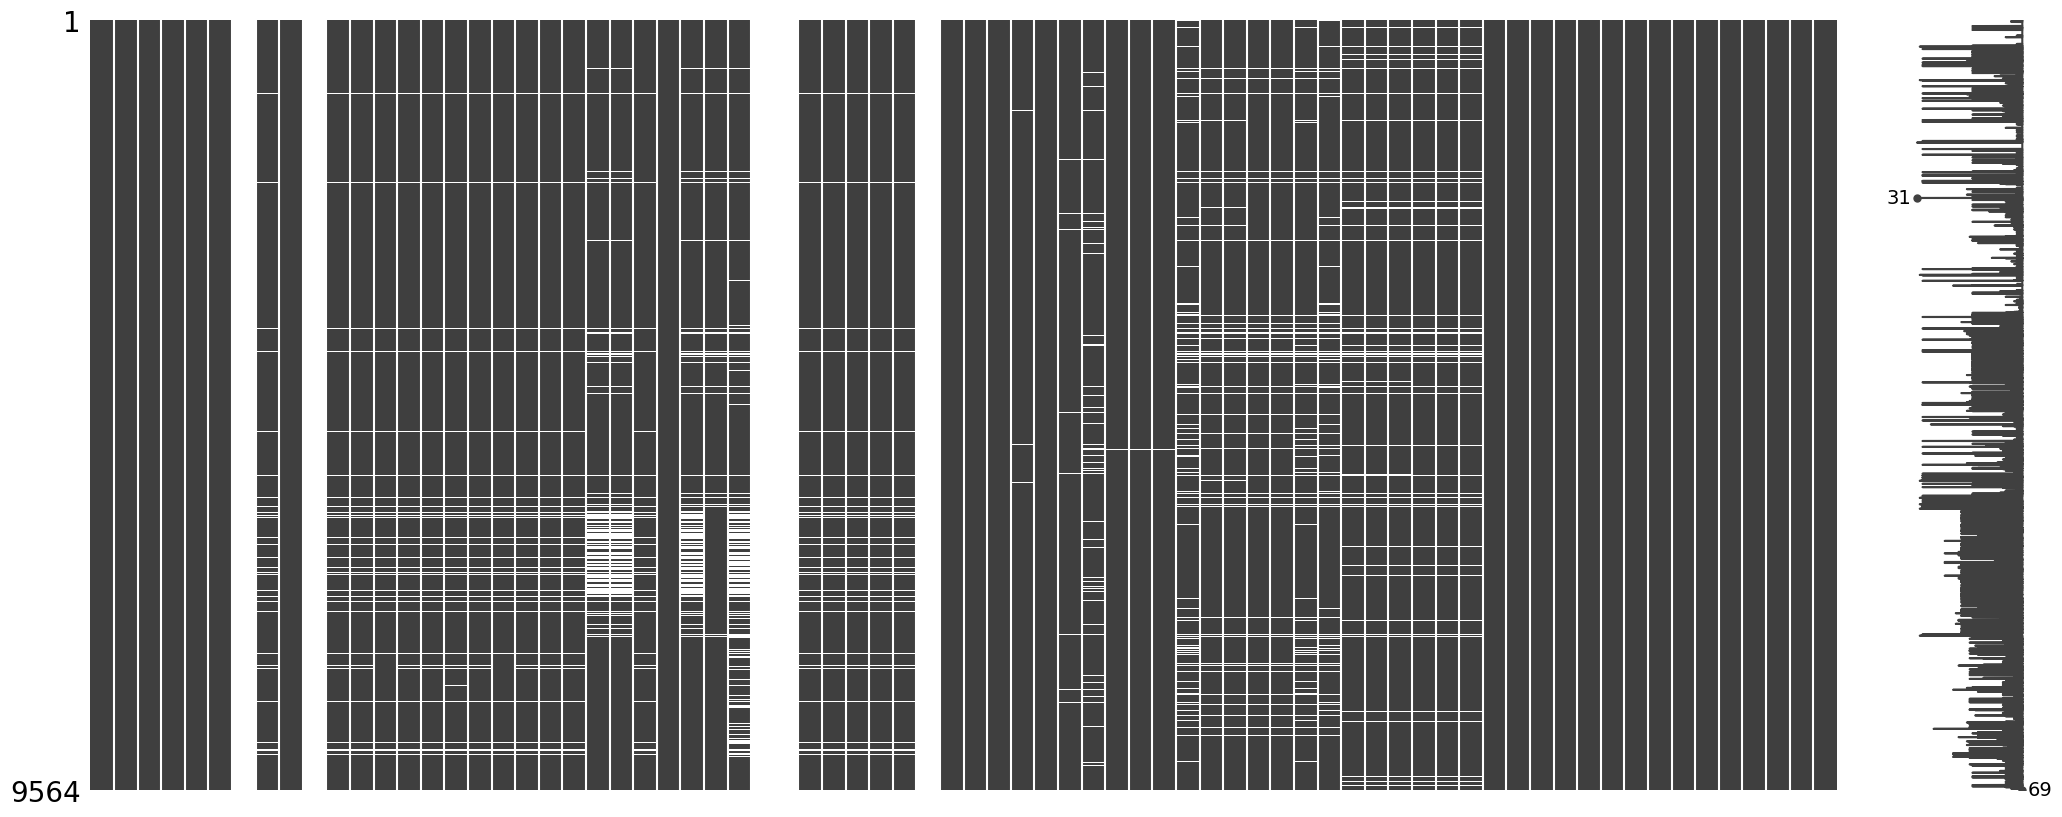

In [19]:
import missingno as msno
msno.matrix(pd.concat([data]))

### 4.2.1. Drop Columns with more than 50% missing values.

Here we dropped all columns that have more than 50% of their data missing.

<AxesSubplot:>

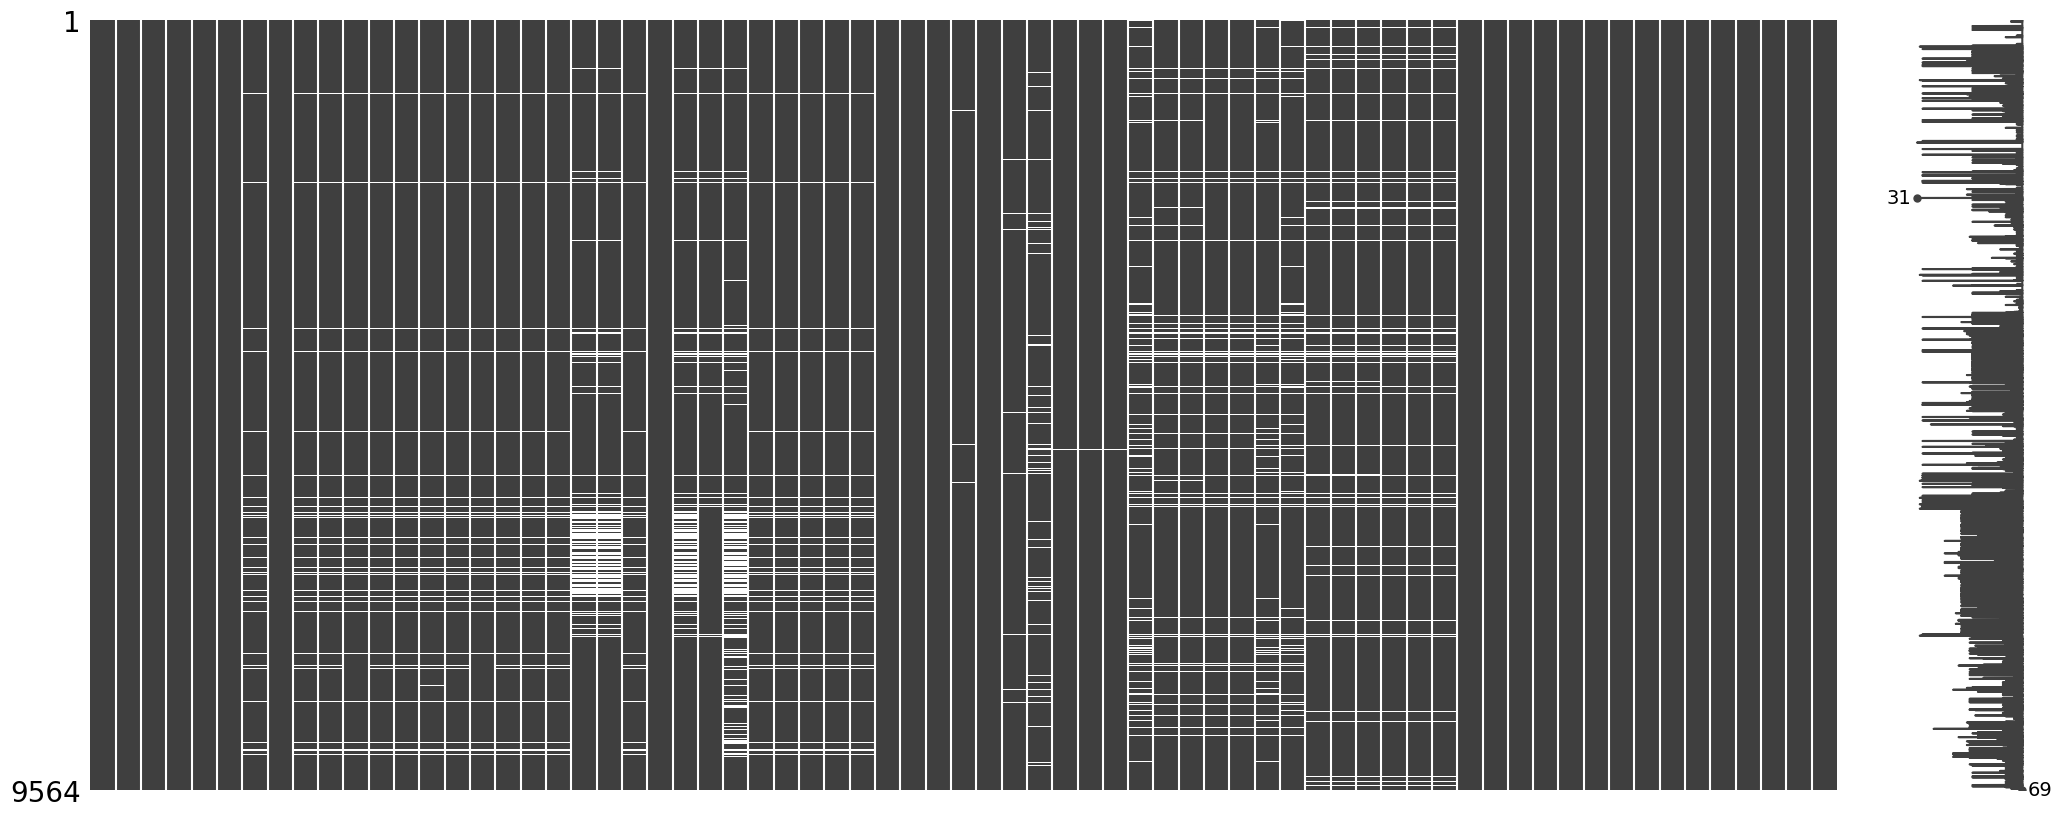

In [20]:
data = data.loc[:, data.isnull().mean() < .5]

msno.matrix(pd.concat([data]))

### 4.2.2. Drop Rows with 50%+ Missing Values

<AxesSubplot:>

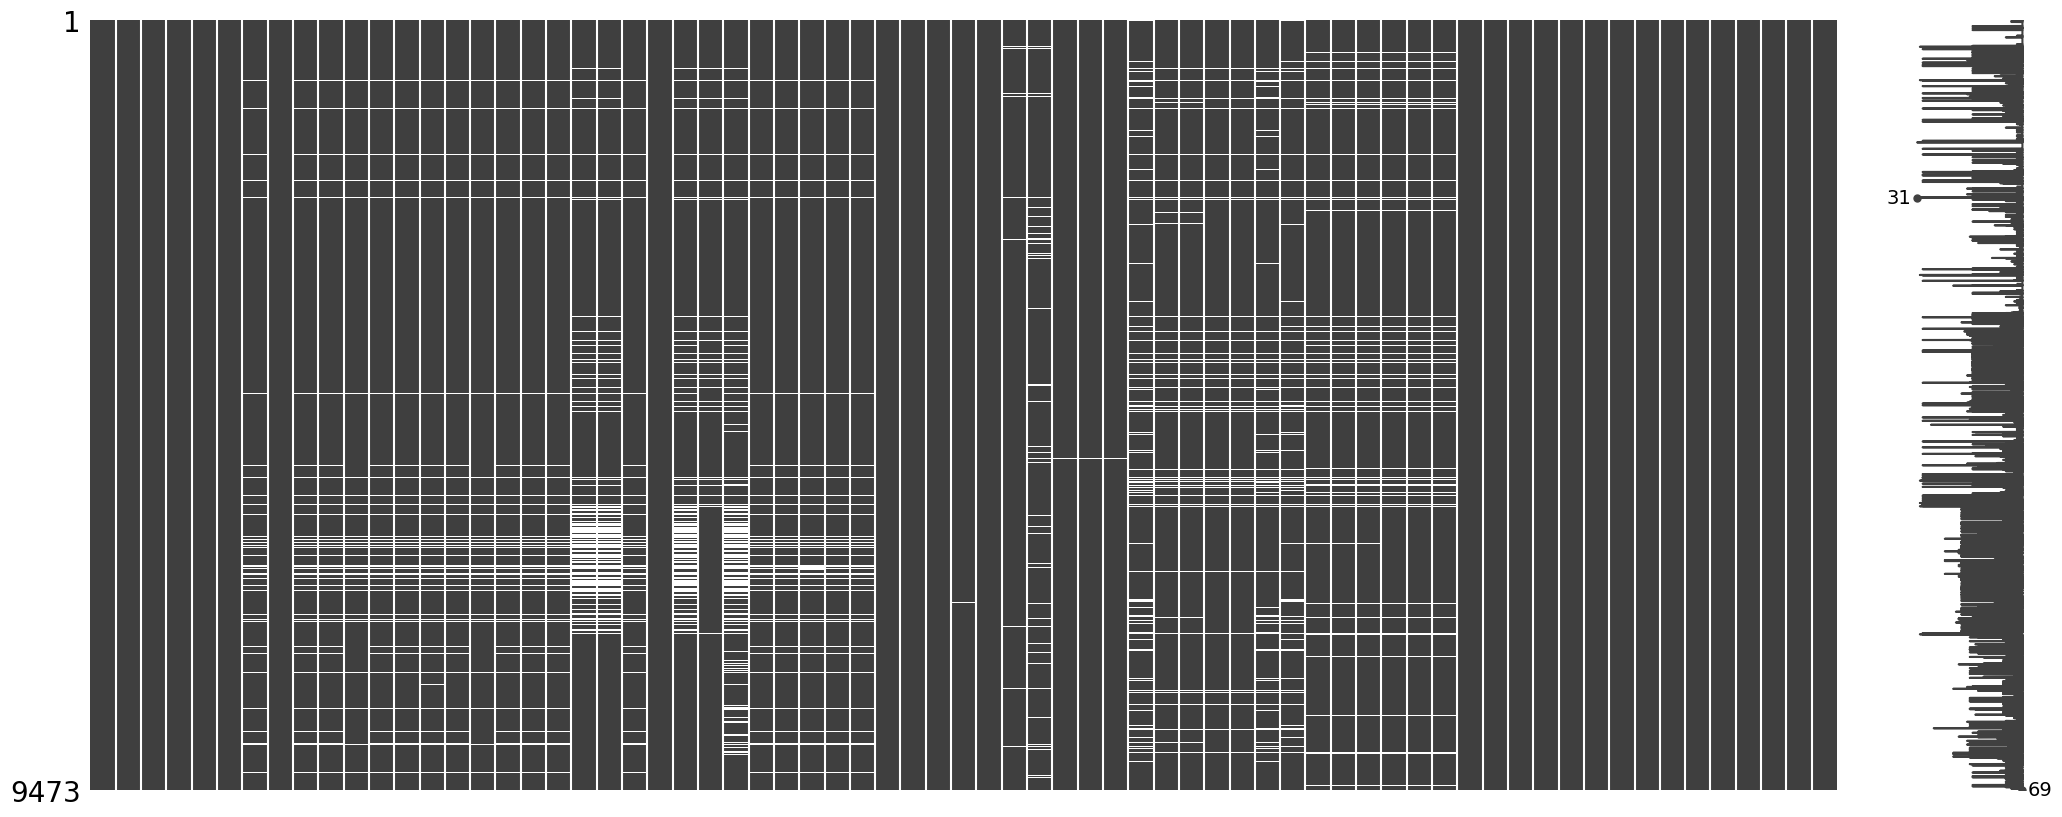

In [21]:
per_row = []
for index in range(len(data.index)) :
    per_row.append([index, data.iloc[index].isna().mean()])

row_missing = pd.DataFrame(per_row, columns=['index', 'missing']).sort_values(by='missing', ascending=False)

rows_to_delete = list(row_missing.loc[row_missing['missing'] > 0.5].index)
data = data.drop(rows_to_delete,axis='index')

msno.matrix(pd.concat([data]))

In [22]:
data.shape

(9473, 69)

### 4.2.3. Impute Missing Valuews

<AxesSubplot:>

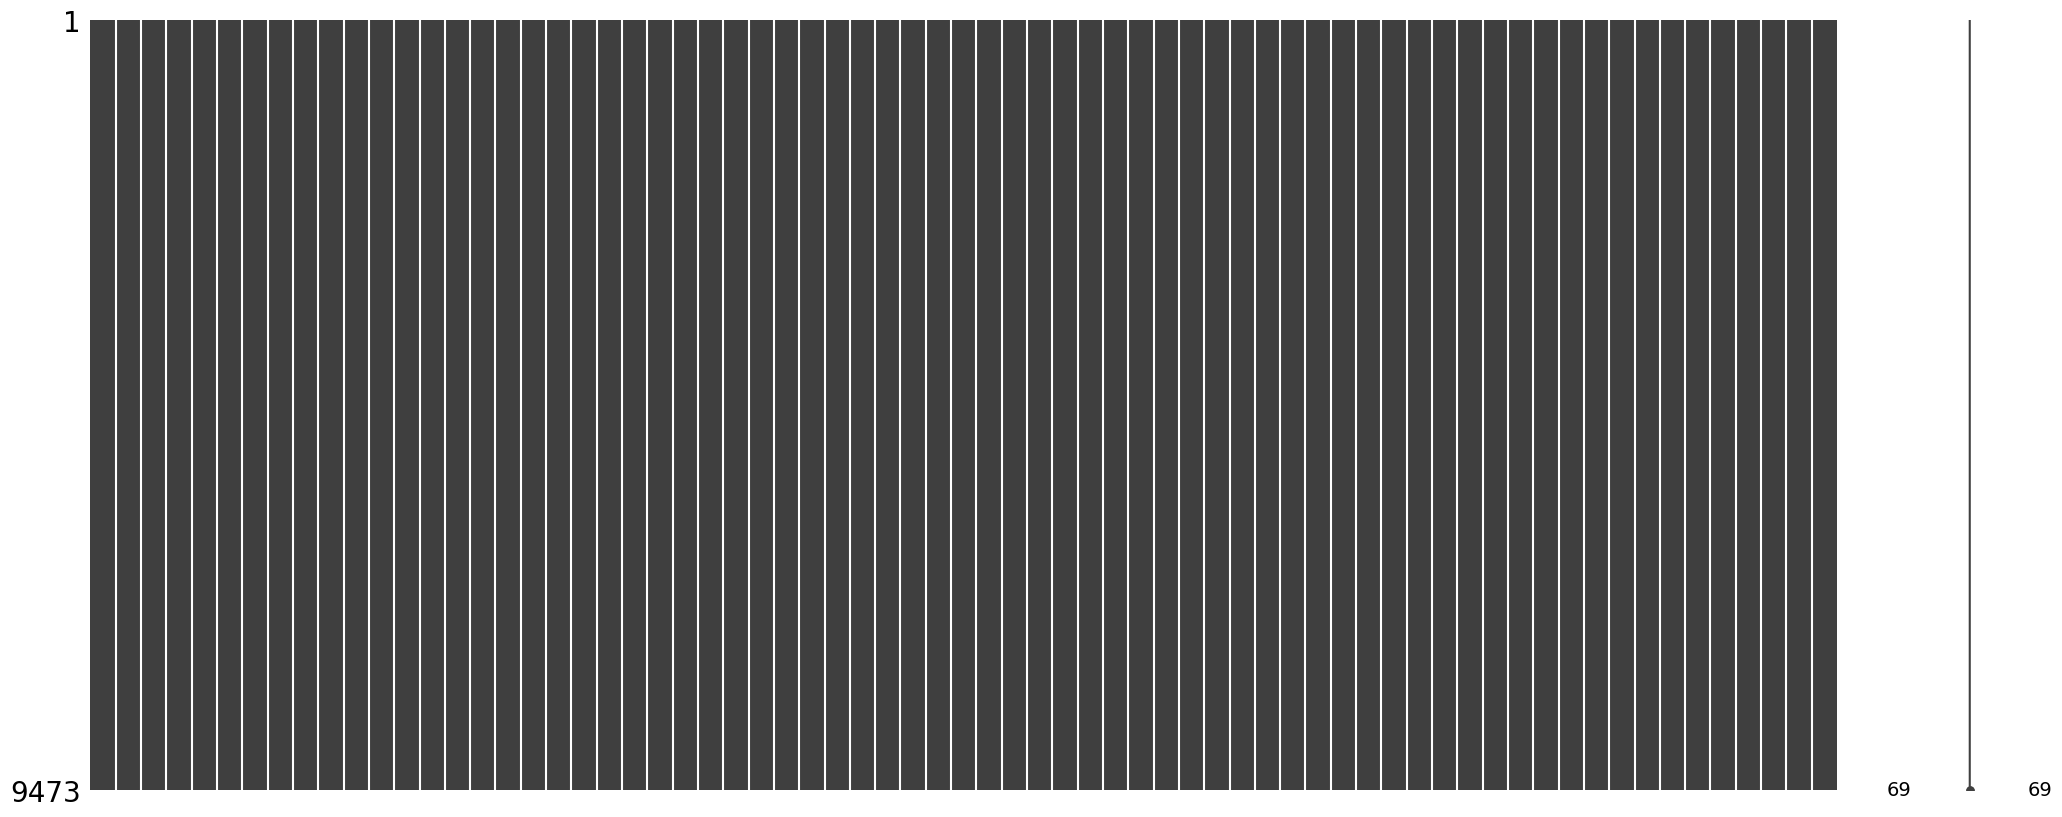

In [23]:
df_imputer_knn = data.copy(deep=True)

# Impute the feature
knnimputer = KNNImputer(n_neighbors=3)
df_imputer_knn.iloc[:,:] = knnimputer.fit_transform(df_imputer_knn)

msno.matrix(pd.concat([df_imputer_knn]))

In [24]:
df_imputer_knn

,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days],TransitEpoch[BKJD],TransitEpoch[BJD],ImpactParameter,TransitDuration[hrs],TransitDepth[ppm],Planet-StarRadiusRatio,...,ParametersProvenance_q1_q16_koi,ParametersProvenance_q1_q17_dr24_koi,ParametersProvenance_q1_q17_dr25_koi,TCEDelivery_q1_q16_tce,TCEDelivery_q1_q17_dr24_tce,TCEDelivery_q1_q17_dr25_tce,StellarParameterProvenance_Solar,StellarParameterProvenance_q1_q17_dr25_stellar,StellarParameterProvenance_stellar_q1_q16,StellarParameterProvenance_stellar_q1_q17
rowid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,9.488036,170.538750,2455003.539,0.146,2.95750,615.8,0.022344,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,54.418383,162.513840,2454995.514,0.586,4.50700,874.8,0.027954,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,19.899140,175.850252,2455008.850,0.969,1.78220,10829.0,0.154046,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.736952,170.307565,2455003.308,1.276,2.40641,8079.2,0.387394,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,2.525592,171.595550,2455004.596,0.701,1.65450,603.3,0.024064,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,1.0,1.0,0.0,0.527699,131.705093,2454964.705,1.252,3.22210,1579.2,0.297633,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9561,0.0,0.0,0.0,1.739849,133.001270,2454966.001,0.043,3.11400,48.5,0.006379,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9562,0.0,1.0,0.0,0.681402,132.181750,2454965.182,0.147,0.86500,103.6,0.009444,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<a id='outliers'></a>
## 4.3. PCA Outlier Detection


In [25]:
features = df_imputer_knn.columns[:]

df_pca = df_imputer_knn.loc[:, features].values
df_pca = StandardScaler().fit_transform(df_pca)

pca = PCA(n_components=2)  # Choose the number of principal components
principal_components = pca.fit_transform(df_pca)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

euclidean_distance = pd.Series(
    [sum(np.square(row)) for row in principal_components],
    name='EuclideanDistance'
)

df_temp_nasa = pd.concat([df_imputer_knn, principal_df, euclidean_distance], axis=1)

df_temp_nasa.dropna(inplace=True)

outliers = df_temp_nasa[df_temp_nasa['EuclideanDistance'] > 80]

outliers

,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days],TransitEpoch[BKJD],TransitEpoch[BJD],ImpactParameter,TransitDuration[hrs],TransitDepth[ppm],Planet-StarRadiusRatio,...,TCEDelivery_q1_q16_tce,TCEDelivery_q1_q17_dr24_tce,TCEDelivery_q1_q17_dr25_tce,StellarParameterProvenance_Solar,StellarParameterProvenance_q1_q17_dr25_stellar,StellarParameterProvenance_stellar_q1_q16,StellarParameterProvenance_stellar_q1_q17,PC1,PC2,EuclideanDistance
326,1.0,0.0,0.0,17.512015,174.282592,2455007.283,0.9940,1.8248,4511.7,0.110483,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.971602,-8.262081,167.694832
327,0.0,0.0,0.0,3.988602,171.018520,2455004.019,0.0600,1.7376,673.5,0.023067,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,11.743151,-9.318752,224.740746
341,0.0,1.0,1.0,0.933749,134.318310,2454967.318,0.7360,4.2560,186.2,0.013481,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,20.035427,28.324858,1203.715902
345,0.0,0.0,0.0,17.157236,133.689510,2454966.690,0.2380,11.2840,110.4,0.009558,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8.055813,-5.882837,99.503903
347,0.0,0.0,0.0,13.118962,261.539434,2455094.539,0.0420,4.3045,372.2,0.017826,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.755561,-6.600451,103.714690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,0.0,0.0,0.0,1.345078,132.042180,2454965.042,0.9526,10.1900,3025.0,0.066497,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.495470,-9.260852,141.945454
9147,1.0,0.0,0.0,0.594004,132.070590,2454965.071,0.4978,5.5570,25.4,0.004786,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.003912,-4.502448,84.334647
9177,0.0,0.0,0.0,364.339290,183.317300,2455016.317,0.9340,13.4860,1944.0,0.050387,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8.011137,-4.135189,81.278106
9309,0.0,0.0,0.0,381.858520,458.813000,2455291.813,0.0240,16.1210,362.9,0.016941,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8.800341,-3.891760,92.591792


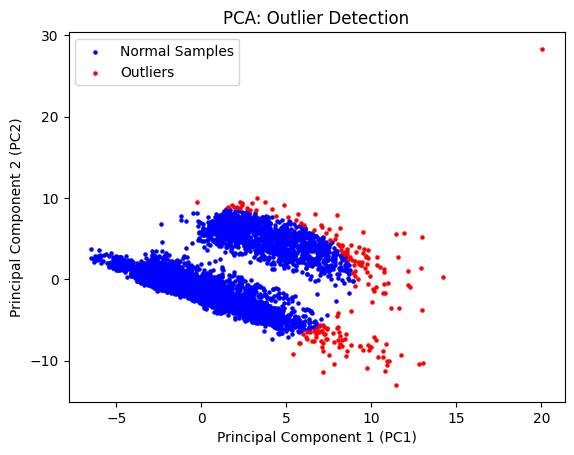

In [26]:
# Assuming you already have the 'outliers' DataFrame
normal_samples = df_temp_nasa.drop(outliers.index)  # Exclude outliers from normal samples

# Plotting the normal samples
plt.scatter(normal_samples['PC1'], normal_samples['PC2'], color='blue', label='Normal Samples', s=5)

# Plotting the outliers
plt.scatter(outliers['PC1'], outliers['PC2'], color='red', label='Outliers', s=5)

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA: Outlier Detection')
plt.legend()
plt.show()

#### Remove all outliers

In [27]:
df_work = df_temp_nasa[df_temp_nasa['EuclideanDistance'] < 80].drop(['PC1', 'PC2', 'EuclideanDistance'], axis=1)

df_work

,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days],TransitEpoch[BKJD],TransitEpoch[BJD],ImpactParameter,TransitDuration[hrs],TransitDepth[ppm],Planet-StarRadiusRatio,...,ParametersProvenance_q1_q16_koi,ParametersProvenance_q1_q17_dr24_koi,ParametersProvenance_q1_q17_dr25_koi,TCEDelivery_q1_q16_tce,TCEDelivery_q1_q17_dr24_tce,TCEDelivery_q1_q17_dr25_tce,StellarParameterProvenance_Solar,StellarParameterProvenance_q1_q17_dr25_stellar,StellarParameterProvenance_stellar_q1_q16,StellarParameterProvenance_stellar_q1_q17
1,0.0,0.0,0.0,9.488036,170.538750,2455003.539,0.146,2.95750,615.8,0.022344,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,54.418383,162.513840,2454995.514,0.586,4.50700,874.8,0.027954,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,19.899140,175.850252,2455008.850,0.969,1.78220,10829.0,0.154046,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.736952,170.307565,2455003.308,1.276,2.40641,8079.2,0.387394,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,2.525592,171.595550,2455004.596,0.701,1.65450,603.3,0.024064,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9468,0.0,0.0,0.0,313.198750,340.937200,2455173.937,0.360,8.60300,721.0,0.024491,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9469,0.0,0.0,0.0,134.370692,249.313600,2455082.314,0.174,8.73000,432.6,0.019016,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9470,0.0,1.0,1.0,2.521230,132.870900,2454965.871,1.158,4.73900,145.9,0.170510,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9471,0.0,0.0,0.0,47.431486,174.654700,2455007.655,0.014,4.51100,172.8,0.011733,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<a id='normalization'></a>
## 4.4. Normalization 

In [28]:
X = df_work.drop('ExoplanetConfirmed', axis=1)
y = df_work['ExoplanetConfirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

We first fit our scaler on the *train* data, and then scale our *test* data with the same scaler.

This is done to prevent data leakage in the scaling process, which may introduce bias in our models.

In [29]:
sc = StandardScaler()
# Fit scaler on train data, transform it
X_train = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
# Transform test data using same scaler
X_test = pd.DataFrame(sc.transform (X_test), index=X_test.index, columns=X_test.columns)

<a id='corr'></a>
## 4.5. Check for Correlated Features


In [30]:
corr_matrix = X_train.corr(method="pearson")
corr_matrix

,StellarEclipseFalsePositiveFlag,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days],TransitEpoch[BKJD],TransitEpoch[BJD],ImpactParameter,TransitDuration[hrs],TransitDepth[ppm],Planet-StarRadiusRatio,...,ParametersProvenance_q1_q16_koi,ParametersProvenance_q1_q17_dr24_koi,ParametersProvenance_q1_q17_dr25_koi,TCEDelivery_q1_q16_tce,TCEDelivery_q1_q17_dr24_tce,TCEDelivery_q1_q17_dr25_tce,StellarParameterProvenance_Solar,StellarParameterProvenance_q1_q17_dr25_stellar,StellarParameterProvenance_stellar_q1_q16,StellarParameterProvenance_stellar_q1_q17
StellarEclipseFalsePositiveFlag,1.000000,0.156288,0.096990,-0.151595,-0.109258,-0.109258,0.054230,0.033623,0.417118,0.045058,...,-0.183036,-0.044204,0.185558,-0.156885,-0.044204,0.185558,0.061080,0.160953,-0.157026,-0.035179
CentroidOffsetFalsePositiveFlag,0.156288,1.000000,0.522941,-0.158353,-0.114274,-0.114274,0.011331,-0.044593,-0.120191,-0.013799,...,-0.140427,-0.017893,0.133790,-0.122223,-0.017893,0.133790,0.045853,0.121716,-0.097116,-0.043069
EphemerisMatchIndicatesContaminationFalsePositiveFlag,0.096990,0.522941,1.000000,-0.138606,-0.098593,-0.098593,-0.003726,0.012637,-0.083897,-0.019764,...,-0.122590,0.002861,0.106909,-0.103831,0.002861,0.106909,0.008206,0.100977,-0.092640,-0.000436
OrbitalPeriod[days],-0.151595,-0.158353,-0.138606,1.000000,0.641740,0.641740,0.040842,0.334444,-0.062325,0.052384,...,0.500689,0.049828,-0.469554,0.456149,0.049828,-0.469554,-0.014709,-0.441060,0.476301,0.061207
TransitEpoch[BKJD],-0.109258,-0.114274,-0.098593,0.641740,1.000000,1.000000,0.040297,0.215770,-0.041240,0.049081,...,0.325465,0.013039,-0.294873,0.319056,0.013039,-0.294873,-0.017310,-0.274099,0.305090,0.029336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCEDelivery_q1_q17_dr25_tce,0.185558,0.133790,0.106909,-0.469554,-0.294873,-0.294873,-0.076841,-0.089441,0.085588,-0.088521,...,-0.845742,-0.470800,1.000000,-0.694694,-0.470800,1.000000,-0.009525,0.951298,-0.766132,-0.372228
StellarParameterProvenance_Solar,0.061080,0.045853,0.008206,-0.014709,-0.017310,-0.017310,0.038957,0.001436,0.092620,0.041253,...,0.009307,0.002415,-0.009525,0.002248,0.002415,-0.009525,1.000000,-0.223919,-0.032872,-0.015971
StellarParameterProvenance_q1_q17_dr25_stellar,0.160953,0.121716,0.100977,-0.441060,-0.274099,-0.274099,-0.076939,-0.086396,0.060516,-0.088194,...,-0.804552,-0.447871,0.951298,-0.660861,-0.447871,0.951298,-0.223919,1.000000,-0.728820,-0.354099
StellarParameterProvenance_stellar_q1_q16,-0.157026,-0.097116,-0.092640,0.476301,0.305090,0.305090,0.042524,0.092295,-0.086331,0.053261,...,0.816828,0.081472,-0.766132,0.678298,0.081472,-0.766132,-0.032872,-0.728820,1.000000,-0.051983


In [31]:
# select upper traingle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#select columns with coefficient of 0.95+ or -0.95- aka high negative/positive linear correlation
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95) or any(upper[column] <= -0.95)]


C:\Users\Nart\AppData\Local\Temp\ipykernel_10264\4245563772.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


<AxesSubplot:>

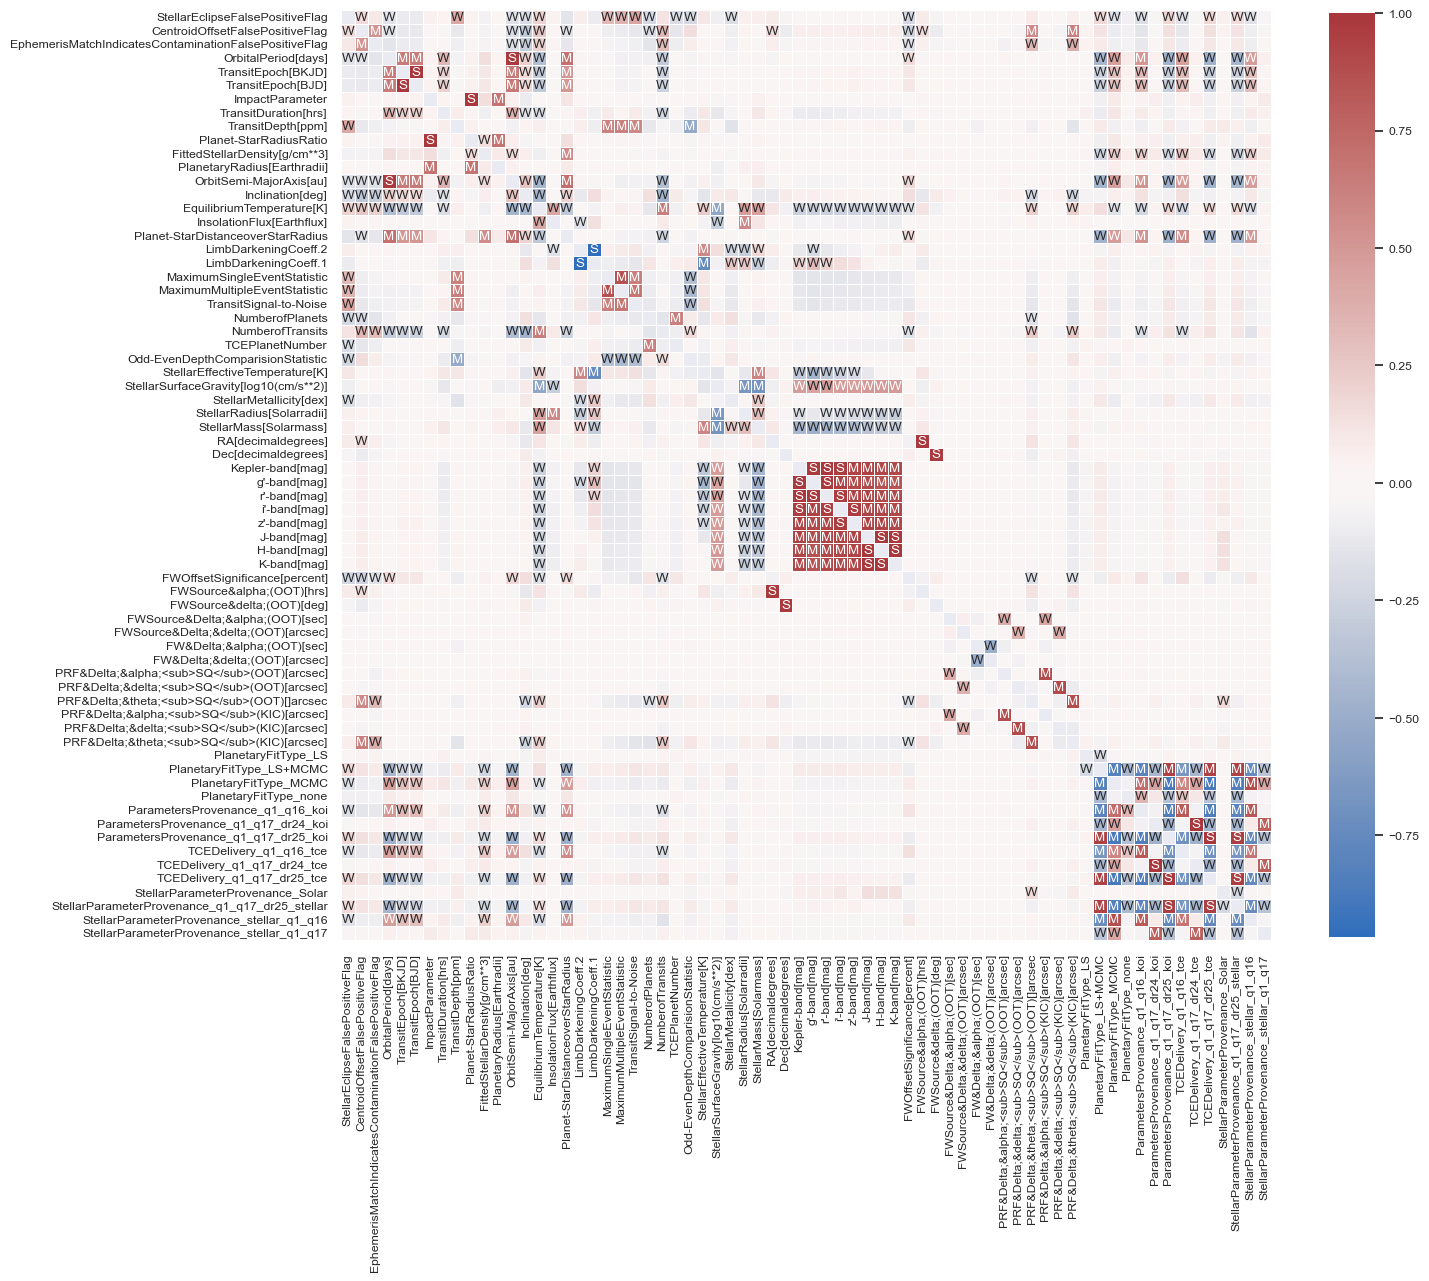

In [32]:
sns.set(font_scale=0.8)


# Create labels for the correlation matrix
labels = np.where(np.abs(corr_matrix)>0.95, "S",
                  np.where(np.abs(corr_matrix)>0.5, "M",
                           np.where(np.abs(corr_matrix)>0.15, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, mask=np.eye(len(corr_matrix)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

In [33]:
# drop the outliers for both train and test data

X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

In [34]:
print(X_train.shape)
print(X_test.shape)

(6901, 53)
(2301, 53)


<a id='balance'></a>
## 4.6. Class Balancing


##### Before we start class balancing the training data, we need to insure that it has a similar class balance to the original dataset.

In [35]:
data_balance = df_work['ExoplanetConfirmed'].value_counts()
train_balance = y_train.value_counts()

print(data_balance[1] / data_balance[0])
print(train_balance[1] / train_balance[0])

0.39933090024330903
0.39922952149229524


The class balance is similar in both the train and orignal datasets, we can continue.

#### We will try both oversampling (SMOTE+TOMEK) and undersampling (CNN+TOMEK) strategies to see which one yields better results.

In [36]:
print('Original dataset shape %s' % Counter(y_train))

# Generate synthetic data using SMOTE
# Remove noisy data using TOMEK Links undersampling
smt = SMOTETomek(random_state=42)
X_res_SMOTE, y_res_SMOTE = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_SMOTE))

Original dataset shape Counter({0.0: 4932, 1.0: 1969})


Resampled dataset shape Counter({0.0: 4909, 1.0: 4909})


In [37]:
from imblearn.under_sampling import CondensedNearestNeighbour 
from imblearn.under_sampling import TomekLinks

print('Original dataset shape %s' % Counter(y_train))

# Perform CNN undersampling
cnn = CondensedNearestNeighbour(random_state=42)  
X_res_cnn, y_res_cnn = cnn.fit_resample(X_train, y_train)  

# Remove noisy data with TOMEK Links undersampling
tl = TomekLinks()
X_res_cnn, y_res_cnn = tl.fit_resample(X_res_cnn, y_res_cnn)

print('Resampled dataset shape %s' % Counter(y_res_cnn))


Original dataset shape Counter({0.0: 4932, 1.0: 1969})
Resampled dataset shape Counter({1.0: 1787, 0.0: 1061})


***

<a id='feature-selection'></a>
## 4.7. Feature Selection after class balancing


#### In this section we will perform feature selection for both the oversampled and undersampled datasets seperately.

In [38]:
# RF fit on SMOTE+TOMEK dataset
oversampled_forest = RandomForestClassifier(random_state=0)
oversampled_forest.fit(X_res_SMOTE, y_res_SMOTE)

# RF fit on CNN+TOMEK dataset
undersampled_forest = RandomForestClassifier(random_state=0)
undersampled_forest.fit(X_res_cnn, y_res_cnn)

RandomForestClassifier(random_state=0)

In [39]:
# Find feature importances using RF permutation
from sklearn.inspection import permutation_importance

os_result = permutation_importance(
    oversampled_forest, X_res_SMOTE, y_res_SMOTE, n_repeats=10, random_state=42, n_jobs=2
)

us_result = permutation_importance(
    undersampled_forest, X_res_cnn, y_res_cnn, n_repeats=10, random_state=42, n_jobs=2
)

In [40]:
feature_names = [f"feature {i}" for i in range(X_res_SMOTE.shape[1])]

os_forest_importances = pd.Series(os_result.importances_mean, index=X_res_SMOTE.columns)
us_forest_importances = pd.Series(us_result.importances_mean, index=X_res_SMOTE.columns)

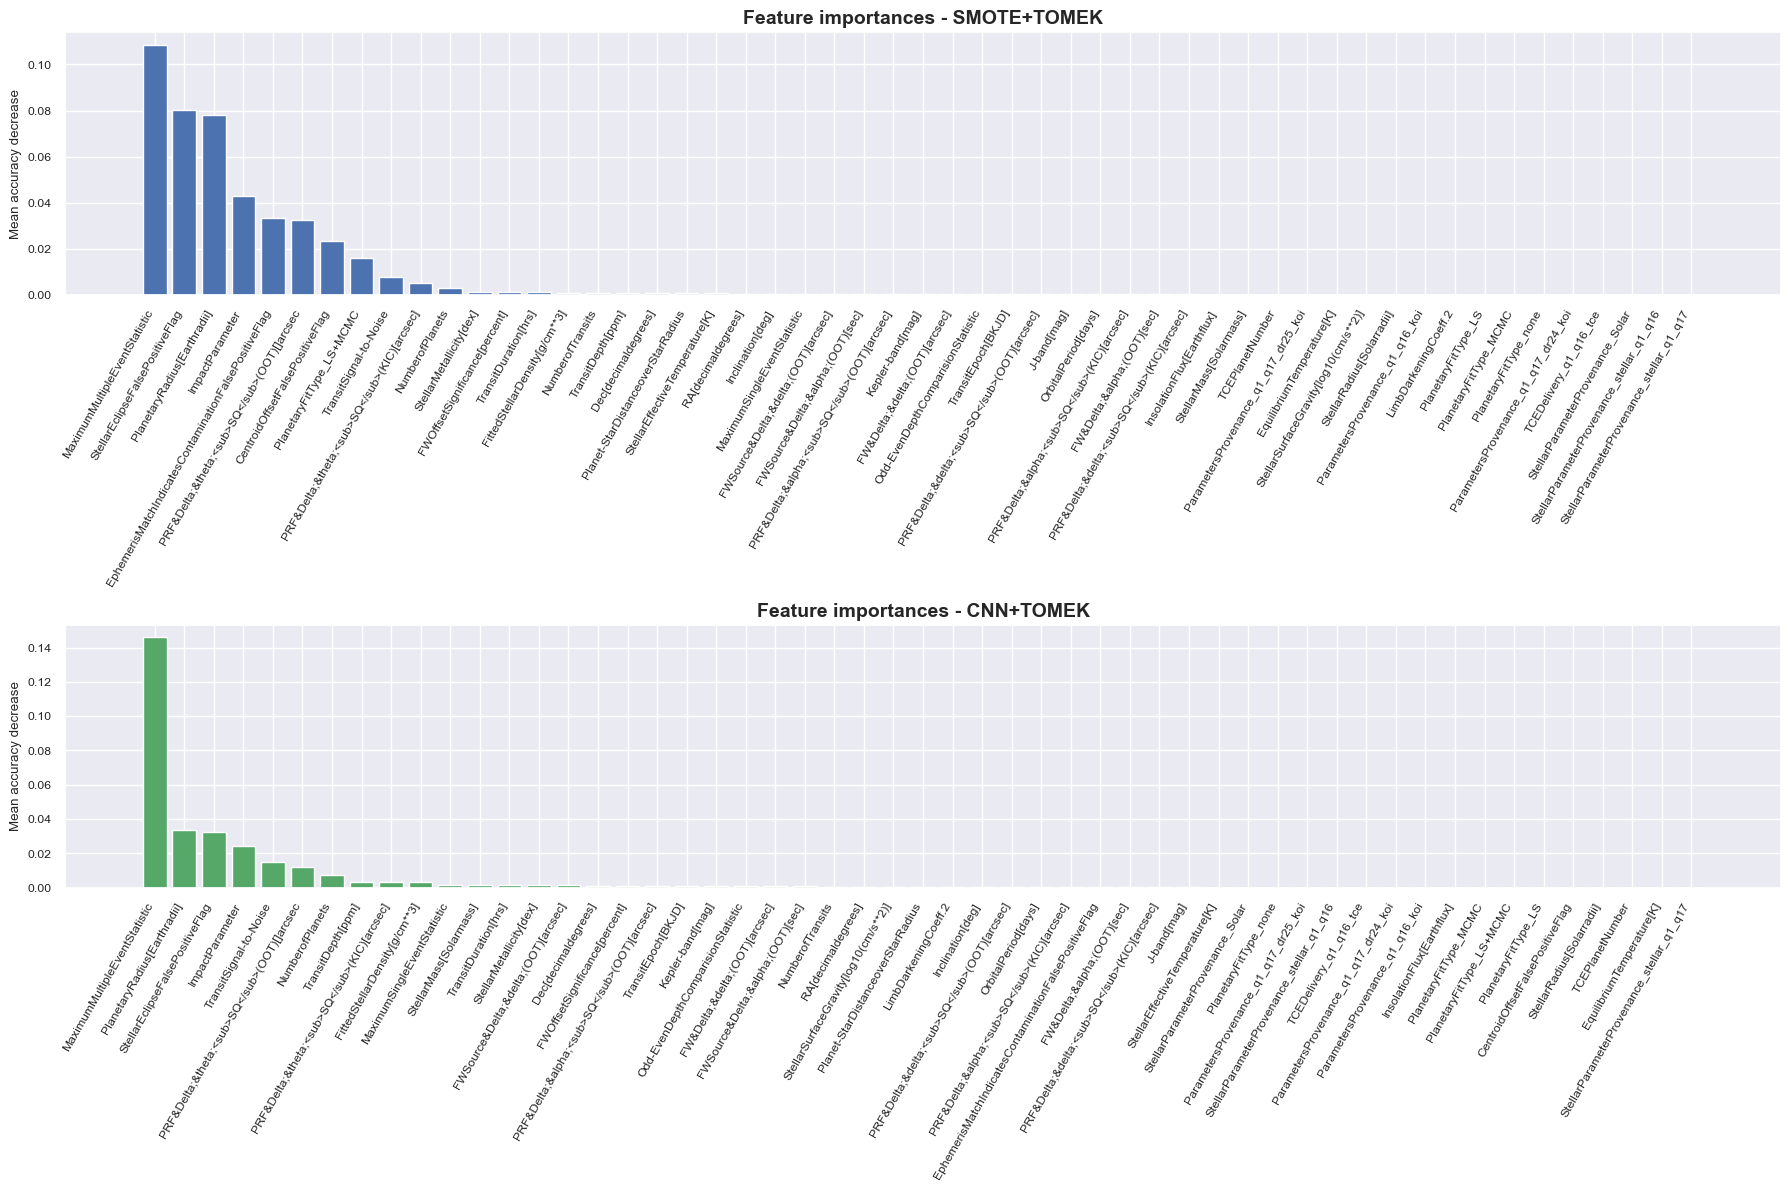

In [41]:
# os_forest_importances.sort_values(ascending=False).plot.bar(ax=ax)

d1 = os_forest_importances.sort_values(ascending=False).values
l1 = os_forest_importances.sort_values(ascending=False).index

d2 = us_forest_importances.sort_values(ascending=False).values
l2 = us_forest_importances.sort_values(ascending=False).index

plt.figure(figsize=(18,12))

plt.subplot(2,1,1)
plt.bar(l1, d1, color='b')
plt.title("Feature importances - SMOTE+TOMEK", fontsize=14, fontweight='bold')
plt.ylabel("Mean accuracy decrease")
plt.xticks(rotation=60, ha='right')

plt.subplot(2,1,2)
plt.bar(l2, d2, color='g')
plt.title("Feature importances - CNN+TOMEK", fontsize=14, fontweight='bold')
plt.ylabel("Mean accuracy decrease")
plt.xticks(rotation=60, ha='right')

plt.tight_layout()

plt.show()

#### Create two filtered datasets with only the most important features. One for the oversampled data, and one for the undersampled data.

In [42]:
importance_threshold = 0.001

# Oversampled importances
os_importance_df = pd.DataFrame({'Feature': X_res_SMOTE.columns, 'Importance': os_forest_importances})
os_importance_df = os_importance_df.sort_values('Importance', ascending=False)

os_important_features = os_importance_df[os_importance_df['Importance'] >= importance_threshold]['Feature']
X_res_os = X_res_SMOTE[os_important_features]
X_test_os = X_test[os_important_features]


# Undersampled importances
us_importance_df = pd.DataFrame({'Feature': X_res_cnn.columns, 'Importance': us_forest_importances})
us_importance_df = us_importance_df.sort_values('Importance', ascending=False)

us_important_features = us_importance_df[us_importance_df['Importance'] >= importance_threshold]['Feature']
X_res_us = X_res_cnn[us_important_features]
X_test_us = X_test[us_important_features]

print(X_res_os.shape)
print(X_res_us.shape)


(9818, 14)
(2848, 18)


***

## 5. Models

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score

In [44]:
X_train_os = X_res_os
y_train_os = y_res_SMOTE

X_train_us = X_res_us
y_train_us = y_res_cnn

In [60]:
from sklearn.metrics import roc_auc_score, make_scorer

def eval_logreg(X_train, y_train, X_test, y_test):
    # Grid search for Logistic Regression
    logreg = LogisticRegression(random_state=42, max_iter=1000)

    logreg_params = {
        'C': np.logspace(-3, 3, 7),  # Regularization parameter (inverse of lambda)
        'penalty': ['l1', 'l2'],     # Regularization type (L1 or L2)
        'solver': ['liblinear'],     # Choose the solver for logistic regression
    }

    scoring_metric = make_scorer(roc_auc_score)

    logreg_grid = GridSearchCV(logreg, logreg_params, scoring=scoring_metric, n_jobs=-1)
    logreg_grid.fit(X_train, y_train)
    logreg_best_params = logreg_grid.best_params_
    logreg_best_model = logreg_grid.best_estimator_
    logreg_predictions = logreg_best_model.predict(X_test)
    logreg_accuracy = accuracy_score(y_test, logreg_predictions)
    logreg_precision = precision_score(y_test, logreg_predictions)
    logreg_recall = recall_score(y_test, logreg_predictions)
    logreg_roc = roc_auc_score(y_test, logreg_predictions)
    logreg_f1 = f1_score(y_test, logreg_predictions)

    return [logreg_accuracy,logreg_precision,logreg_recall,logreg_roc, logreg_f1, logreg_best_model]

In [61]:
logreg_os_res = eval_logreg(X_train_os, y_train_os, X_test_os, y_test)
logreg_us_res = eval_logreg(X_train_us, y_train_us, X_test_us, y_test)

In [62]:
def eval_dt(X_train, y_train, X_test, y_test):
    # Grid search for Decision Trees
    dt = DecisionTreeClassifier()
    dt_params = {'max_depth': [None, 5, 10]}
    dt_grid = GridSearchCV(dt, dt_params)
    dt_grid.fit(X_train, y_train)
    dt_best_params = dt_grid.best_params_
    dt_best_model = dt_grid.best_estimator_
    dt_predictions = dt_best_model.predict(X_test)
    dt_accuracy = accuracy_score(y_test, dt_predictions)
    dt_precision = precision_score(y_test, dt_predictions)
    dt_recall = recall_score(y_test, dt_predictions)
    dt_roc = roc_auc_score(y_test, dt_predictions)
    dt_f1 = f1_score(y_test, dt_predictions)

    return [dt_accuracy,dt_precision,dt_recall,dt_roc, dt_f1, dt_best_model]

In [63]:
dt_os_res = eval_dt(X_train_os, y_train_os, X_test_os, y_test)
dt_us_res = eval_dt(X_train_us, y_train_us, X_test_us, y_test)

In [64]:
def eval_rf(X_train, y_train, X_test, y_test):
    # Grid search for Random Forests
    rf = RandomForestClassifier(n_jobs=-1)
    rf_params = {'n_estimators': [100, 200, 300]}
    rf_grid = GridSearchCV(rf, rf_params)
    rf_grid.fit(X_train, y_train)
    rf_best_params = rf_grid.best_params_
    rf_best_model = rf_grid.best_estimator_
    rf_predictions = rf_best_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_predictions)
    rf_precision = precision_score(y_test, rf_predictions)
    rf_recall = recall_score(y_test, rf_predictions)
    rf_roc = roc_auc_score(y_test, rf_predictions)
    rf_f1 = f1_score(y_test, rf_predictions)

    return [rf_accuracy,rf_precision,rf_recall,rf_roc, rf_f1, rf_best_model]

In [65]:
rf_os_res = eval_rf(X_train_os, y_train_os, X_test_os, y_test)
rf_us_res = eval_rf(X_train_us, y_train_us, X_test_us, y_test)

In [88]:
from sklearn.svm import SVC

def eval_svm(X_train, y_train, X_test, y_test):
    # Define the parameter grid to search for the best hyperparameters
    param_grid = {
        'C': [0.1, 1, 10, 100],           # Regularization parameter
        'kernel': ['rbf', 'poly'],        # Kernels to try: RBF and polynomial
        'degree': [2, 3, 4],              # Degree for the polynomial kernel
        'gamma': ['scale', 'auto'],       # Kernel coefficient for 'rbf' kernel
    }

    # Create the SVM classifier
    svm = SVC(probability=True)

    # Use GridSearchCV to find the best hyperparameters using cross-validation
    svm_grid = GridSearchCV(svm, param_grid, cv=5)
    svm_grid.fit(X_train, y_train)

    svm_best_model = svm_grid.best_estimator_
    svm_predictions = svm_best_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    svm_precision = precision_score(y_test, svm_predictions)
    svm_recall = recall_score(y_test, svm_predictions)
    svm_roc = roc_auc_score(y_test, svm_predictions)
    svm_f1 = f1_score(y_test, svm_predictions)

    return [svm_accuracy,svm_precision,svm_recall,svm_roc, svm_f1, svm_best_model]

In [ ]:
svm_os_res = eval_svm(X_train_os, y_train_os, X_test_os, y_test)
svm_us_res = eval_svm(X_train_us, y_train_us, X_test_us, y_test)

***
### Plotting the results

#### ROC Curves

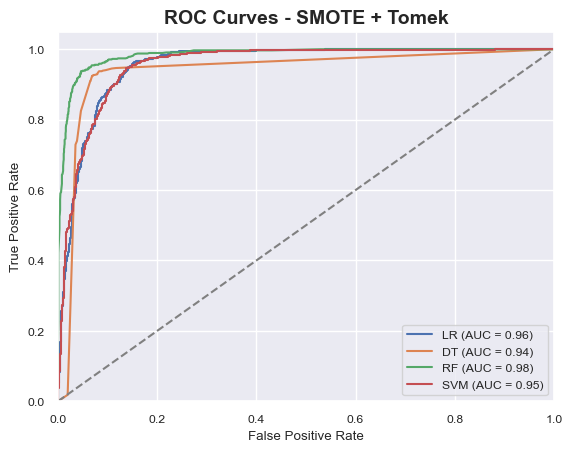

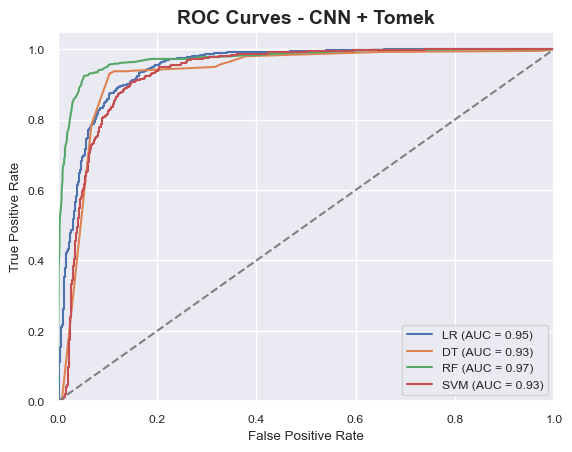

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# List of models for 'models_os'
models_os = [logreg_os_res[5], dt_os_res[5], rf_os_res[5], svm_os_res[5]]

# List of models for 'models_us'
models_us = [logreg_us_res[5], dt_us_res[5], rf_us_res[5], svm_us_res[5]]

# List of model names for plotting
model_names = ['LR', 'DT', 'RF', 'SVM']

# Create separate ROC curve plots for 'models_os'
plt.figure()
for i, model in enumerate(models_os):
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict_proba(X_test_os)[:, 1]
    else:
        y_pred = model.decision_function(X_test_os)  # Use decision_function for SVM

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model_names[i], auc))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal (random classifier)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - SMOTE + Tomek', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.show()

# Create separate ROC curve plots for 'models_us'
plt.figure()
for i, model in enumerate(models_us):
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict_proba(X_test_us)[:, 1]
    else:
        y_pred = model.decision_function(X_test_us)  # Use decision_function for SVM

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(model_names[i], auc))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal (random classifier)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - CNN + Tomek', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.show()


We can see that our **SMOTE+Tomak** models performed better than the **CNN+Tomak** ones, so we will be using only them onwards.

***
#### Evaluation Metrics

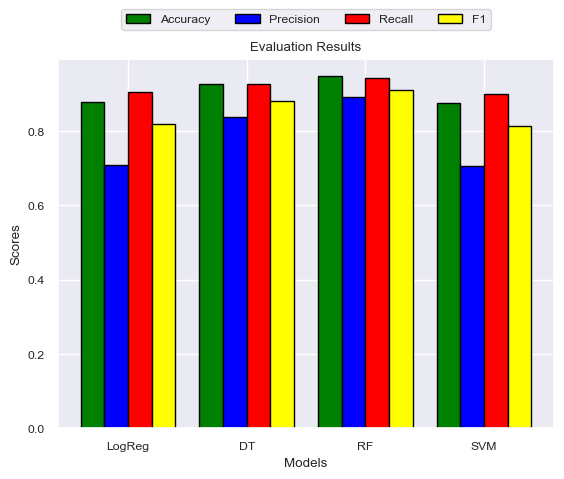

In [94]:
import matplotlib.pyplot as plt

# Evaluation results for each model

accuracy = [logreg_os_res[0], dt_os_res[0], rf_os_res[0], svm_os_res[0]]
precision = [logreg_os_res[1], dt_os_res[1], rf_os_res[1], svm_os_res[1]]
recall = [logreg_os_res[3], dt_os_res[3], rf_os_res[3], svm_os_res[3]]
f1 = [logreg_os_res[4], dt_os_res[4], rf_os_res[4], svm_os_res[4]]

# Model names
models = ['LogReg', 'DT', 'RF', 'SVM']

# Set the width of the bars
bar_width = 0.25

# Define the positions of the bars on the x-axis
x = np.arange(len(models))

# Set the width of each bar and the separation between models
bar_width = 0.2
bar_separation = 0.1

# Create the bar plot for each metric
plt.bar(x - 2*bar_width - bar_separation, accuracy, width=bar_width, label='Accuracy', color='green', edgecolor='black')
plt.bar(x - bar_width - bar_separation, precision, width=bar_width, label='Precision', color='blue', edgecolor='black')
plt.bar(x - bar_separation, recall, width=bar_width, label='Recall', color='red', edgecolor='black')
plt.bar(x + bar_width - bar_separation, f1, width=bar_width, label='F1', color='yellow', edgecolor='black')


# Add x-axis labels
plt.xlabel('Models')
plt.ylabel('Scores')

# Add y-axis label
plt.title('Evaluation Results')

# Add x-axis tick labels
plt.xticks(x - bar_width / 2 - bar_separation, models)

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

# Display the plot
plt.show()


### We can observe than our best model for classification is the **Random Forest** trained on the **SMOTE+TOMEK** oversampled dataset.

------------------------------------------------------------------------------------------------------

<a id='model-building'></a>

## 5. Model Building
Next, we will build different machine learning models for exoplanet classification. Some of the models we can consider are:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Machines (SVM)
5. Gradient Boosting

For each model, we will perform the following steps:
1. Initialize the model with default parameters.
2. Train the model on the training data.
3. Evaluate the model's performance using appropriate metrics.
4. Tune the hyperparameters if necessary.
------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------

<a id='model-evaluation'></a>

## 6. Model Evaluation
After building and tuning the models, we will evaluate their performance using various evaluation metrics such as accuracy, precision, recall, and F1-score. We will also visualize the results using confusion matrices and ROC curves.

------------------------------------------------------------------------------------------------------

<a id='conclusion'></a>

## 7. Conclusion

In conclusion, this project aims to classify exoplanets using machine learning techniques. By exploring the dataset, preprocessing the data, building and evaluating different models, we will gain insights into the classification of exoplanets and identify the most accurate model for exoplanet classification.

------------------------------------------------------------------------------------------------------

<a id='references'></a>

## 8. References

1. [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html)
2. Insert other references or resources used during the project.